# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [29]:
# Add Matplotlib inline magic command
%matplotlib inline

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import functools

### Merge the DataFrames

In [31]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [32]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [33]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,3/6/19 4:28,34.58,3.908450e+12
5,South Latoya,3/11/19 12:26,9.52,1.995000e+12
6,New Paulville,2/27/19 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/19 0:43,35.98,1.119540e+11
8,South Karenland,1/8/19 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/19 6:26,42.81,5.327640e+12


In [34]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [35]:
# Get the ride count data by city type.
ride_count_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
ride_count_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [36]:
# Get the driver count data by city type.
driver_count_by_type = city_data_df.groupby(['type']).sum()['driver_count']
driver_count_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [37]:
# Get the total fares by city type.
total_fares_by_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare']
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [38]:
# Get the average fare per ride by city type.
average_fares_per_ride_by_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare'] / pyber_data_df.set_index(['type']).groupby(['type']).count()['fare']
average_fares_per_ride_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [39]:
# Get the average fare per driver by city type.
average_fares_per_driver_by_type = pyber_data_df.set_index(['type']).groupby(['type']).sum()['fare'] / city_data_df.set_index(['type']).groupby(['type']).sum()['driver_count']
average_fares_per_driver_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [43]:
# Adding a list of values with keys to create a new DataFrame and apply formatting.
pyber_summary_df = pd.DataFrame(
          {"Total Rides": ride_count_by_type.map("{:,}".format),
          "Total Drivers": driver_count_by_type.map("{:,}".format),
          "Total Fares": total_fares_by_type.map("${:,.2f}".format),
          "Average Fare per Ride": average_fares_per_ride_by_type.map("${:,.2f}".format),
          "Average Fare per Driver": average_fares_per_driver_by_type.map("${:,.2f}".format)})

# remove index name
pyber_summary_df.index.name
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [44]:
# Rename columns in combined ride dataframe
pyber_data_df.rename(columns = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace=True)
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12,4,Rural


In [45]:
# Set the index to the data
pyber_data_df = pyber_data_df.set_index(['Date'])

In [46]:
# Make a copy with fewer columns
pyber_data_df_copy = pyber_data_df.copy()[['Fare', 'City Type']]
pyber_data_df_copy

,Fare,City Type
Date,,
1/14/19 10:14,13.83,Urban
3/4/19 18:24,30.24,Urban
2/24/19 4:29,33.44,Urban
2/10/19 23:22,23.44,Urban
3/6/19 4:28,34.58,Urban
...,...,...
4/29/19 17:04,13.38,Rural
1/30/19 0:05,20.76,Rural
2/10/19 21:03,11.11,Rural


In [47]:
# Change the datatype of the index to datetime
pyber_data_df_copy.index = pd.to_datetime(pyber_data_df_copy.index)
pyber_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [48]:
# Create a new dateframe grouped by city type and date
pyber_data_df_fare_by_type = pd.DataFrame(pyber_data_df_copy.groupby(['City Type', 'Date']).sum()['Fare'])
pyber_data_df_fare_by_type.reset_index()
pyber_data_df_fare_by_type

Fare
City Type Date                      
Rural     2019-01-01 09:45:00  43.69
          2019-01-02 11:18:00  52.12
          2019-01-03 19:51:00  19.90
          2019-01-04 03:31:00  24.88
          2019-01-06 07:38:00  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:00  18.45
          2019-05-08 07:29:00  18.55
          2019-05-08 11:38:00  19.77
          2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [49]:
# create a pivot table with the index as date and columns as city types
pyber_pivot = pd.pivot_table(pyber_data_df_fare_by_type, values="Fare", index=["Date"], columns=['City Type'])
pyber_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [50]:
# Create a dataframe from the pivot table above
pyber_pivot_df = pyber_pivot.loc['2019-01-01':'2019-04-28']
pyber_pivot_df.tail()

City Type,Rural,Suburban,Urban
Date,,,
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43
2019-04-28 17:38:00,NaN,34.87,NaN
2019-04-28 19:35:00,NaN,16.96,NaN


In [51]:
# Resample dataframe to weekly sum
pyber_pivot_df_weekly = pyber_pivot_df.resample('W').sum()
pyber_pivot_df_weekly

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


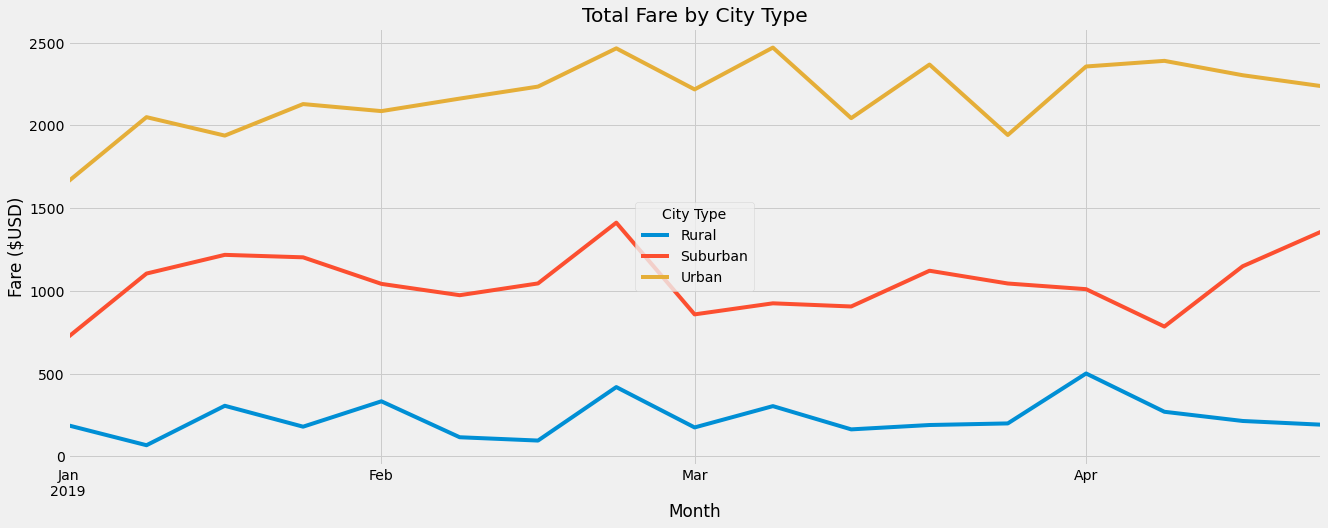

In [55]:
# Choose style
plt.style.use('fivethirtyeight')

# Create a plot
ax = pyber_pivot_df_weekly.plot(figsize=(20, 7.5))
                                
# Create titles, axis labels, and legend
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("Month")
# Save plot to analysis folder
plt.savefig("Resources/pyber_challenge.png")

plt.show()

In [ ]:
PY